# Laboratory Seven - Cluster Analysis I

## First Dataset

In [1]:
import pandas as pd

missing_values = ["?"]
data1 = pd.read_csv('/Users/adunifekizitookoye/Desktop/CSCI 4150U - Data Mining/breast-cancer-wisconsin.data',
                   header=None, na_values = missing_values)
data1.columns = ['ID number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
                'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin', 'Normal Nucleoli', 'Mitoses','Class']
data1.head(1)

,ID number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2


In [2]:
import numpy as np

for col in data1.columns:
    if data1[col].isnull().values.any():
        data1[col] = data1[col].replace(to_replace = np.nan, value = 0)

### Part I:

1. Perform k-means clustering on different datasets (use k = 2, 3,..., 6)

In [3]:
from sklearn import cluster
data = data1.drop(['ID number','Class'],axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data)
labels = k_means.labels_
pd.DataFrame(labels, index=data1['ID number'], columns = ['Cluster ID'])

,Cluster ID
ID number,
1000025,0
1002945,1
1015425,0
1016277,1
1017023,0
...,...
776715,0
841769,0
888820,1


In [4]:
from sklearn import cluster

centroids = k_means.cluster_centers_
centroidsdata = pd.DataFrame(centroids,columns=data.columns)
centroidsdata

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,3.043011,1.301075,1.443011,1.337634,2.088172,1.268817,2.103226,1.251613,1.109677
1,7.149573,6.777778,6.713675,5.726496,5.457265,7.824786,6.089744,6.076923,2.542735


2. Calculate the SSE and plot sum-of-squared errors (SSE) versus k

Text(0, 0.5, 'SSE')

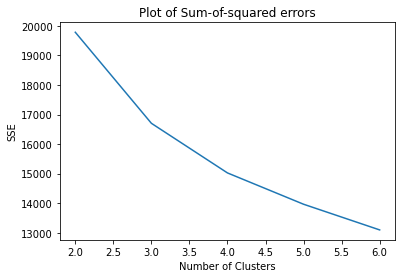

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.title('Plot of Sum-of-squared errors')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

3. Find the best k using the elbow approach (see the tutorial)

        Best K seem to be 3 or 4

4. Find the centers of clusters and  find the top-5 closest points to the center of each cluster

In [6]:
cluster = 0
N = 5
closest = np.argsort(k_means.transform(data)[:, cluster])[::-1][:N]

print("top 5 closet points to cluster 0")
for i in closest:
    print("data in row",i)
    print(data.iloc[i])
    print("\n")

top 5 closet points to cluster 0
data in row 360
Clump Thickness                 6.0
Uniformity of Cell Size        10.0
Uniformity of Cell Shape       10.0
Marginal Adhesion              10.0
Single Epithelial Cell Size    10.0
Bare Nuclei                    10.0
Bland Chromatin                 8.0
Normal Nucleoli                10.0
Mitoses                        10.0
Name: 360, dtype: float64


data in row 286
Clump Thickness                10.0
Uniformity of Cell Size        10.0
Uniformity of Cell Shape       10.0
Marginal Adhesion              10.0
Single Epithelial Cell Size    10.0
Bare Nuclei                    10.0
Bland Chromatin                 4.0
Normal Nucleoli                10.0
Mitoses                        10.0
Name: 286, dtype: float64


data in row 612
Clump Thickness                 8.0
Uniformity of Cell Size        10.0
Uniformity of Cell Shape       10.0
Marginal Adhesion              10.0
Single Epithelial Cell Size     6.0
Bare Nuclei                    10.0

In [7]:
#when cluster equals 1
cluster = 1
N = 5
closest = np.argsort(k_means.transform(data)[:, cluster])[::-1][:N]

print("top 5 closet points to cluster 1")
for i in closest:
    print("data in row",i)
    print(data.iloc[i])
    print("\n")

top 5 closet points to cluster 1
data in row 689
Clump Thickness                1.0
Uniformity of Cell Size        1.0
Uniformity of Cell Shape       1.0
Marginal Adhesion              1.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    1.0
Bland Chromatin                1.0
Normal Nucleoli                1.0
Mitoses                        8.0
Name: 689, dtype: float64


data in row 617
Clump Thickness                1.0
Uniformity of Cell Size        1.0
Uniformity of Cell Shape       1.0
Marginal Adhesion              1.0
Single Epithelial Cell Size    1.0
Bare Nuclei                    0.0
Bland Chromatin                1.0
Normal Nucleoli                1.0
Mitoses                        1.0
Name: 617, dtype: float64


data in row 411
Clump Thickness                1.0
Uniformity of Cell Size        1.0
Uniformity of Cell Shape       1.0
Marginal Adhesion              1.0
Single Epithelial Cell Size    1.0
Bare Nuclei                    0.0
Bland Chromatin        

In [8]:
#when cluster equals 2
cluster = 2
N = 5
closest = np.argsort(k_means.transform(data)[:, cluster])[::-1][:N]

print("top 5 closet points to cluster 2")
for i in closest:
    print("data in row",i)
    print(data.iloc[i])
    print("\n")

top 5 closet points to cluster 2
data in row 689
Clump Thickness                1.0
Uniformity of Cell Size        1.0
Uniformity of Cell Shape       1.0
Marginal Adhesion              1.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    1.0
Bland Chromatin                1.0
Normal Nucleoli                1.0
Mitoses                        8.0
Name: 689, dtype: float64


data in row 6
Clump Thickness                 1.0
Uniformity of Cell Size         1.0
Uniformity of Cell Shape        1.0
Marginal Adhesion               1.0
Single Epithelial Cell Size     2.0
Bare Nuclei                    10.0
Bland Chromatin                 3.0
Normal Nucleoli                 1.0
Mitoses                         1.0
Name: 6, dtype: float64


data in row 163
Clump Thickness                1.0
Uniformity of Cell Size        1.0
Uniformity of Cell Shape       1.0
Marginal Adhesion              2.0
Single Epithelial Cell Size    1.0
Bare Nuclei                    3.0
Bland Chromatin   

In [9]:
#when cluster equals 3
cluster = 3
N = 5
closest = np.argsort(k_means.transform(data)[:, cluster])[::-1][:N]

print("top 5 closet points to cluster 3")
for i in closest:
    print("data in row",i)
    print(data.iloc[i])
    print("\n")

top 5 closet points to cluster 3
data in row 648
Clump Thickness                 5.0
Uniformity of Cell Size        10.0
Uniformity of Cell Shape       10.0
Marginal Adhesion              10.0
Single Epithelial Cell Size    10.0
Bare Nuclei                     2.0
Bland Chromatin                10.0
Normal Nucleoli                10.0
Mitoses                        10.0
Name: 648, dtype: float64


data in row 482
Clump Thickness                 9.0
Uniformity of Cell Size        10.0
Uniformity of Cell Shape       10.0
Marginal Adhesion              10.0
Single Epithelial Cell Size    10.0
Bare Nuclei                     5.0
Bland Chromatin                10.0
Normal Nucleoli                10.0
Mitoses                        10.0
Name: 482, dtype: float64


data in row 104
Clump Thickness                10.0
Uniformity of Cell Size        10.0
Uniformity of Cell Shape       10.0
Marginal Adhesion              10.0
Single Epithelial Cell Size    10.0
Bare Nuclei                     1.0

###  Part II:

1. Perform hierarchical  clustering (Single Link, Complete Link, and Group Average ) on different data sets 

In [10]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data1['ID number']
Y = data1['Class']
X = data1.drop(['ID number','Class'],axis=1)

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z_single = hierarchy.linkage(X, 'single')

In [12]:
Z_complete = hierarchy.linkage(X, 'complete')

In [13]:
Z_average = hierarchy.linkage(X, 'complete')

2. Draw a dendrogram diagram for each case (use appropriate options of the dendrogram to draw a nice visualization). See resource (3)

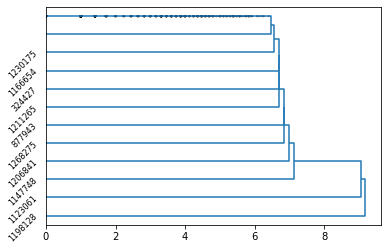

In [14]:
dn = hierarchy.dendrogram(Z_single,labels=names.tolist(),orientation='right',
                            truncate_mode='lastp',  # show only the last p merged clusters
                            p=12,  # show only the last p merged clusters
                            show_leaf_counts=False,  # otherwise numbers in brackets are counts
                            leaf_rotation=45.,
                            leaf_font_size=8.,
                            show_contracted=True,
                         )

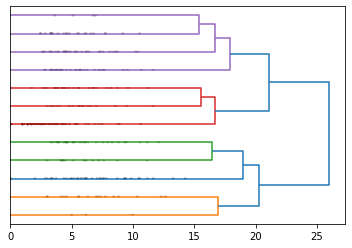

In [15]:
dn = hierarchy.dendrogram(Z_complete,labels=names.tolist(),
                          orientation='right',
                            truncate_mode='lastp',  # show only the last p merged clusters
                            p=12,  # show only the last p merged clusters
                            show_leaf_counts=False,  # otherwise numbers in brackets are counts
                            leaf_rotation=90.,
                            leaf_font_size=12.,
                            show_contracted=True,
                         )

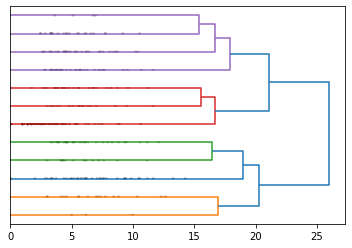

In [16]:
dn = hierarchy.dendrogram(Z_average,labels=names.tolist(),
                          orientation='right',
                            truncate_mode='lastp',  # show only the last p merged clusters
                            p=12,  # show only the last p merged clusters
                            show_leaf_counts=False,  # otherwise numbers in brackets are counts
                            leaf_rotation=45.,
                            leaf_font_size=8.,
                            show_contracted=True,
                         )

## Second Dataset

In [17]:
import pandas as pd
data2 = pd.read_csv('/Users/adunifekizitookoye/Desktop/CSCI 4150U - Data Mining/waveform.data', header=None)
data2.columns = ['col1', 'col2', 'col3','col4','col5','col6','col7','col8','col9','col10','col11','col12','col13','col14',
                'col15','col16','col17','col18','col19','col20','col21','Class']
data2.head(1)

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col13,col14,col15,col16,col17,col18,col19,col20,col21,Class
0,-1.23,-1.56,-1.75,-0.28,0.6,2.22,0.85,0.21,-0.2,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.2,0.24,-0.56,2


In [18]:
import numpy as np

for col in data2.columns:
    if data2[col].isnull().values.any():
        data2[col] = data2[col].replace(to_replace = np.nan, value = 0)

### Part 1

1. Perform k-means clustering on different datasets (use k = 2, 3,..., 6)

In [19]:
from sklearn import cluster
data_w = data2.drop(['col1','Class'],axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data_w)
labels = k_means.labels_
pd.DataFrame(labels, index=data2['col1'], columns = ['Cluster ID'])

,Cluster ID
col1,
-1.23,1
-0.69,0
-0.12,0
0.86,0
1.16,0
...,...
-0.65,1
-0.02,0
0.01,0


In [20]:
from sklearn import cluster

centroids = k_means.cluster_centers_
centroidsdata = pd.DataFrame(centroids,columns=data_w.columns)
centroidsdata

,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21
0,0.586629,1.171344,1.760605,2.347620,3.279245,4.198375,3.916860,3.688128,3.521974,3.339232,2.504261,1.657461,1.383712,1.119525,0.742681,0.304021,0.228034,0.168964,0.094196,-0.033643
1,0.098286,0.188471,0.245642,0.305201,0.753755,1.171249,1.439255,1.686470,2.471332,3.334050,3.507715,3.669768,3.875674,4.130051,3.220662,2.335169,1.750075,1.139251,0.612526,-0.009480


2. Calculate the SSE and plot sum-of-squared errors (SSE) versus k

Text(0, 0.5, 'SSE')

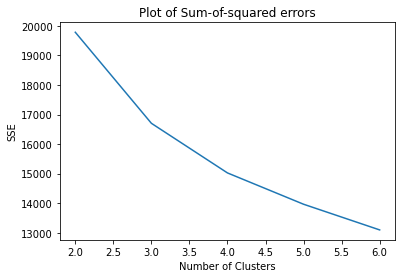

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [2,3,4,5,6]
SSE_w = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data_w)
    SSE_w.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.title('Plot of Sum-of-squared errors')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

3. Find the best k using the elbow approach (see the tutorial)

        Best K seem to be 3 or 4

4. Find the centers of clusters and  find the top-5 closest points to the center of each cluster

In [22]:
cluster0 = 0
N = 5
closest0 = np.argsort(k_means.transform(data_w)[:, cluster0])[::-1][:N]

print("top 5 closet points to cluster 0")
for i in closest0:
    print("data in row",i)
    print(data_w.iloc[i])
    print("\n")

top 5 closet points to cluster 0
data in row 4524
col2    -1.11
col3    -1.83
col4    -1.06
col5    -1.55
col6    -0.64
col7     0.48
col8    -0.99
col9    -0.08
col10    0.63
col11    0.94
col12    3.02
col13    2.57
col14    4.97
col15    7.66
col16    7.55
col17    5.24
col18    4.51
col19    1.88
col20    1.89
col21    0.68
Name: 4524, dtype: float64


data in row 3309
col2    -0.19
col3     0.04
col4     0.05
col5    -0.29
col6    -2.04
col7    -0.05
col8     0.62
col9    -0.89
col10    0.10
col11    2.69
col12    3.42
col13    5.23
col14    6.28
col15    7.80
col16    4.88
col17    4.66
col18    3.36
col19    2.06
col20    2.74
col21   -0.93
Name: 3309, dtype: float64


data in row 1328
col2     0.71
col3    -1.35
col4    -1.14
col5     0.08
col6    -2.32
col7    -1.77
col8    -0.64
col9    -0.64
col10   -0.27
col11    2.22
col12    2.61
col13    2.47
col14    4.52
col15    6.50
col16    3.03
col17    5.32
col18    4.70
col19    2.10
col20    0.06
col21   -0.52
Name: 1328, dtype:

In [23]:
cluster1 = 1
N = 5
closest1 = np.argsort(k_means.transform(data_w)[:, cluster1])[::-1][:N]

print("top 5 closet points to cluster 1")
for i in closest1:
    print("data in row",i)
    print(data_w.iloc[i])
    print("\n")

top 5 closet points to cluster 1
data in row 4210
col2     1.17
col3     2.63
col4     3.37
col5     2.25
col6     5.93
col7     8.76
col8     4.35
col9     5.17
col10    2.87
col11    2.07
col12    1.11
col13    0.94
col14   -2.37
col15   -0.65
col16   -0.30
col17   -2.17
col18   -1.21
col19   -0.82
col20   -1.47
col21    1.39
Name: 4210, dtype: float64


data in row 3280
col2     0.70
col3     1.89
col4     2.90
col5     5.43
col6     6.75
col7     6.81
col8     6.87
col9     4.44
col10    3.61
col11    3.87
col12    1.17
col13   -0.26
col14   -1.33
col15    0.76
col16   -0.06
col17   -0.43
col18   -0.19
col19   -0.40
col20    0.88
col21   -0.30
Name: 3280, dtype: float64


data in row 2996
col2     0.17
col3     1.69
col4     2.03
col5     5.26
col6     4.68
col7     7.28
col8     6.72
col9     4.19
col10    4.13
col11    1.95
col12    1.08
col13   -0.30
col14    0.65
col15   -1.75
col16   -0.08
col17   -1.12
col18   -0.35
col19   -1.77
col20    0.64
col21   -0.29
Name: 2996, dtype:

In [24]:
cluster2 = 2
N = 5
closest2 = np.argsort(k_means.transform(data_w)[:, cluster2])[::-1][:N]

print("top 5 closet points to cluster 2")
for i in closest2:
    print("data in row",i)
    print(data_w.iloc[i])
    print("\n")

top 5 closet points to cluster 2
data in row 4524
col2    -1.11
col3    -1.83
col4    -1.06
col5    -1.55
col6    -0.64
col7     0.48
col8    -0.99
col9    -0.08
col10    0.63
col11    0.94
col12    3.02
col13    2.57
col14    4.97
col15    7.66
col16    7.55
col17    5.24
col18    4.51
col19    1.88
col20    1.89
col21    0.68
Name: 4524, dtype: float64


data in row 3309
col2    -0.19
col3     0.04
col4     0.05
col5    -0.29
col6    -2.04
col7    -0.05
col8     0.62
col9    -0.89
col10    0.10
col11    2.69
col12    3.42
col13    5.23
col14    6.28
col15    7.80
col16    4.88
col17    4.66
col18    3.36
col19    2.06
col20    2.74
col21   -0.93
Name: 3309, dtype: float64


data in row 1257
col2     0.57
col3    -1.10
col4     1.55
col5    -0.71
col6    -0.70
col7    -1.49
col8    -0.20
col9    -0.58
col10    1.78
col11    2.66
col12    4.69
col13    3.36
col14    5.17
col15    7.04
col16    5.25
col17    5.69
col18    4.42
col19    3.23
col20    0.84
col21    1.69
Name: 1257, dtype:

In [25]:
cluster3 = 3
N = 5
closest3 = np.argsort(k_means.transform(data_w)[:, cluster3])[::-1][:N]

print("top 5 closet points to cluster 3")
for i in closest3:
    print("data in row",i)
    print(data_w.iloc[i])
    print("\n")

top 5 closet points to cluster 3
data in row 4210
col2     1.17
col3     2.63
col4     3.37
col5     2.25
col6     5.93
col7     8.76
col8     4.35
col9     5.17
col10    2.87
col11    2.07
col12    1.11
col13    0.94
col14   -2.37
col15   -0.65
col16   -0.30
col17   -2.17
col18   -1.21
col19   -0.82
col20   -1.47
col21    1.39
Name: 4210, dtype: float64


data in row 4524
col2    -1.11
col3    -1.83
col4    -1.06
col5    -1.55
col6    -0.64
col7     0.48
col8    -0.99
col9    -0.08
col10    0.63
col11    0.94
col12    3.02
col13    2.57
col14    4.97
col15    7.66
col16    7.55
col17    5.24
col18    4.51
col19    1.88
col20    1.89
col21    0.68
Name: 4524, dtype: float64


data in row 1085
col2    -0.26
col3     1.25
col4    -1.29
col5     0.52
col6    -0.26
col7    -0.20
col8     1.89
col9     3.62
col10    5.97
col11    9.06
col12    5.57
col13    5.97
col14    3.59
col15    2.40
col16    1.61
col17    0.29
col18   -0.55
col19   -1.21
col20    0.34
col21    0.13
Name: 1085, dtype:

###  Part II:

1. Perform hierarchical  clustering (Single Link, Complete Link, and Group Average ) on different data sets

In [26]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data2['col1']
Y_2 = data2['Class']
X_2 = data2.drop(['col1','Class'],axis=1)

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z_single2 = hierarchy.linkage(X_2, 'single')

In [28]:
Z_complete2 = hierarchy.linkage(X_2, 'complete')

In [29]:
Z_average2 = hierarchy.linkage(X_2, 'complete')

2. Draw a dendrogram diagram for each case (use appropriate options of the dendrogram to draw a nice visualization). See resource (3). 

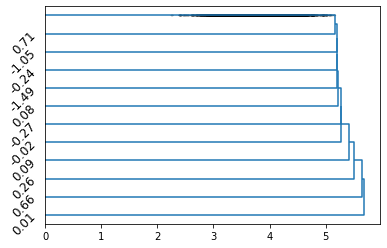

In [30]:
import sys
sys.setrecursionlimit(10000)

dn = hierarchy.dendrogram(Z_single2,labels=names.tolist(),orientation='right',
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=45.,
    leaf_font_size=12.,
    show_contracted=True,)

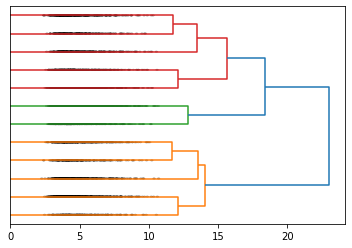

In [31]:
dn = hierarchy.dendrogram(Z_complete2,
                          labels=names.tolist(),
                          orientation='right',
                        truncate_mode='lastp',
                        p=12,
                        show_leaf_counts=False,  
                        leaf_rotation=90.,
                        leaf_font_size=12.,
                        show_contracted=True,)

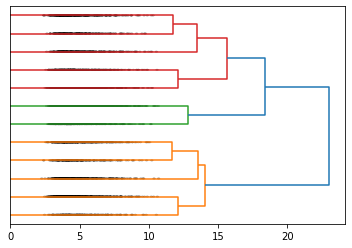

In [32]:
dn = hierarchy.dendrogram(Z_average2,labels=names.tolist(),orientation='right',
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=180.,
    leaf_font_size=12.,
    show_contracted=True,)